In [1]:
import numpy as np
from pyrex.core import Cookware
import matplotlib.pyplot as plt
from qcextender.dimensionlesswaveform import DimensionlessWaveform
from qcextender.waveform import Waveform

/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain

In [2]:
sim = 'SXS:BBH:1155'
dimensionless = DimensionlessWaveform.from_sim(sim)

eccentricity = 0
x = np.float64(0.14139682985076596)
distance, inclination, coa_phase = 10, 0, 0
spin1x, spin1z, spin1y = 0, 0, 0
spin2x, spin2z, spin2y = 0, 0, 0
mean_per_anomaly = 0.667

mass1 = mass2 = 12.5

std_phenom = {
    "mass1": mass1,
    "mass2": mass2,
    "eccentricity": eccentricity,
    "approximant": "IMRPhenomD",
    "spin1x": spin1x,
    "spin1y": spin1y,
    "spin1z": spin1z,
    "spin2x": spin2x,
    "spin2y": spin2y,
    "spin2z": spin2z,
    "inclination": inclination,
    "distance": distance,
    "coa_phase": coa_phase,
    "f_lower": 25,
    "x": x,
}
std_seob = std_phenom.copy()
std_seob["approximant"] = "SEOBNRv4"
dimension = dimensionless.to_Waveform(25, mass1 + mass2, distance)

phen_ecc = Cookware(**std_phenom).get_wave()
seob_ecc = Cookware(**std_seob).get_wave()

/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/sxscatalog/simulations/simulations.py:384: UserWarning: 
Downloads were turned off, so we are using the latest cached
simulations file, tagged v3.0.0, which may be out of date.
  warnings.warn(warning)


/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/amin/Projects/School/Masters/25_26-Thesis/pyrex/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


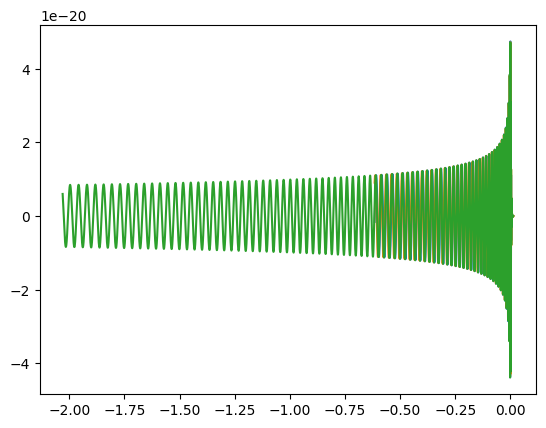

In [3]:
plt.plot(phen_ecc.time, phen_ecc[2, 2])
plt.plot(seob_ecc.time, seob_ecc[2, 2])
plt.plot(dimension.time, dimension[2, 2])
plt.show()